# Pandas-Python library for data Manipulation & Analytics

### **Import Pandas library**

In [3]:
import pandas as pd     # import Pandas library
print('Pandas version:', pd.__version__)   # get Pandas version
import numpy as np     # import Numpy library
print('Numpy version:', np.__version__)   # get Numpy version


Pandas version: 2.2.2
Numpy version: 1.26.4


### **Data Structures in Pandas**

| Feature                  | Series                      | DataFrame                          | Panel (Deprecated)               |
|--------------------------|-----------------------------|------------------------------------|----------------------------------|
| **Dimensionality**       | One-dimensional             | Two-dimensional                    | Three-dimensional                |
| **Structure**            | Single column of data       | Collection of columns (multiple Series) | Collection of DataFrames         |
| **Data Types**           | Any data type               | Different data types per column    | Typically homogeneous data types  |
| **Indexing**             | Labeled index for elements  | Labeled index for both rows and columns | Labeled index for dimensions      |
| **Creation Methods**     | From lists, arrays, dicts   | From dictionaries, lists, files    | From arrays or multi-dimensional data |
| **Usage**                | For single variable analysis  | For tabular data analysis           | For multi-dimensional data (less common) |
| **Performance**          | Efficient for one-dimensional operations | Efficient for two-dimensional operations | Less efficient; often replaced by DataFrames with MultiIndex |

In [16]:
import pandas as pd
import numpy as np

# 1. Series
data = [10, 20, 30, 40]
series1 = pd.Series(data)
series2 = pd.Series(data, index=['a', 'b', 'c', 'd'])
print("Pandas Series1:")
print(series1)
print("\n")
print("Pandas Series2:")
print(series2)
print("\n")

# 2. DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'San Francisco', 'Los Angeles']}
df = pd.DataFrame(data)
print("Pandas DataFrame:")
print(df)
print("\n")

# 3. Panel Alternative: Using MultiIndex DataFrame
# Creating data
multi_data = {
    ('Item1', 'Row1'): [1, 2],
    ('Item1', 'Row2'): [3, 4],
    ('Item2', 'Row1'): [5, 6],
    ('Item2', 'Row2'): [7, 8]
}

# Convert to DataFrame with MultiIndex
multi_df = pd.DataFrame(multi_data)
multi_df.columns = pd.MultiIndex.from_tuples(multi_df.columns, names=['Item', 'Row'])
print("MultiIndex DataFrame (Panel Alternative):")
print(multi_df)
print("\n")

# Explanation: Accessing MultiIndex DataFrame
print("Accessing MultiIndex DataFrame (Item1, Row1):")
print(multi_df['Item1']['Row1'])

Pandas Series1:
0    10
1    20
2    30
3    40
dtype: int64


Pandas Series2:
a    10
b    20
c    30
d    40
dtype: int64


Pandas DataFrame:
      Name  Age           City
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   35    Los Angeles


MultiIndex DataFrame (Panel Alternative):
Item Item1      Item2     
Row   Row1 Row2  Row1 Row2
0        1    3     5    7
1        2    4     6    8


Accessing MultiIndex DataFrame (Item1, Row1):
0    1
1    2
Name: Row1, dtype: int64


### **Data frame operations**
- Accessing data from Data Frames
- Adding and Removing Columns
- Filtering and Conditional Selection
- Sorting Data Frames
- Aggregating Data Frames
- Group data with groupby.
- Handling Missing Data
- Combining Data Frames
- Pivot Tables
- Exporting and Importing Data Frames to files

In [ ]:
# Creating a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
        'Score': [85, 90, 95, 80]}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print("\n")

### 1. Accessing Data
# Access a single column
print("Accessing 'Name' column:")
print(df['Name'])
print("\n")

# Access multiple columns
print("Accessing 'Name' and 'Score' columns:")
print(df[['Name', 'Score']])
print("\n")

# Access rows using loc (label-based)
print("Accessing rows using loc:")
print(df.loc[1:2])
print("\n")

# Access rows using iloc (integer-based)
print("Accessing rows using iloc:")
print(df.iloc[0:2])
print("\n")

### 2. Adding and Removing Columns
# Adding a new column
df['Passed'] = df['Score'] > 80
print("After adding 'Passed' column:")
print(df)
print("\n")

# Dropping a column
df_dropped = df.drop('City', axis=1)
print("After dropping 'City' column:")
print(df_dropped)
print("\n")

### 3. Filtering and Conditional Selection
# Filter rows based on condition
filtered_df = df[df['Score'] > 85]
print("Rows where 'Score' > 85:")
print(filtered_df)
print("\n")

# Multiple conditions
filtered_multiple = df[(df['Score'] > 80) & (df['Age'] > 30)]
print("Rows where 'Score' > 80 and 'Age' > 30:")
print(filtered_multiple)
print("\n")

### 4. Sorting
# Sort by a single column
sorted_df = df.sort_values(by='Score', ascending=False)
print("DataFrame sorted by 'Score' (descending):")
print(sorted_df)
print("\n")

# Sort by multiple columns
sorted_multi = df.sort_values(by=['Age', 'Score'], ascending=[True, False])
print("DataFrame sorted by 'Age' and 'Score':")
print(sorted_multi)
print("\n")

### 5. Aggregation and Grouping
# Aggregation
print("Average Score:", df['Score'].mean())
print("\n")

# Grouping
grouped = df.groupby('Passed')['Score'].mean()
print("Average 'Score' by 'Passed' status:")
print(grouped)
print("\n")

### 6. Handling Missing Data
# Creating a DataFrame with missing values
df_missing = pd.DataFrame({'A': [1, 2, np.nan], 'B': [4, np.nan, 6], 'C': [7, 8, 9]})
print("DataFrame with missing values:")
print(df_missing)
print("\n")

# Filling missing values
filled_df = df_missing.fillna(0)
print("After filling missing values with 0:")
print(filled_df)
print("\n")

# Dropping rows with missing values
dropped_na = df_missing.dropna()
print("After dropping rows with missing values:")
print(dropped_na)
print("\n")

### 7. Combining DataFrames
# Concatenation
df2 = pd.DataFrame({'Name': ['Eve', 'Frank'], 'Age': [45, 50], 'City': ['Phoenix', 'Seattle'], 'Score': [88, 92]})
concatenated = pd.concat([df, df2], ignore_index=True)
print("After concatenating two DataFrames:")
print(concatenated)
print("\n")

# Merging
df3 = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Team': ['Red', 'Blue', 'Green']})
merged = pd.merge(df, df3, on='Name')
print("After merging with another DataFrame:")
print(merged)
print("\n")

### 8. Pivot Tables
pivot = df.pivot_table(values='Score', index='Passed', aggfunc=np.mean)
print("Pivot Table:")
print(pivot)
print("\n")

### 9. Exporting and Importing
# Exporting to CSV (uncomment the line to save a file)
# df.to_csv('data.csv', index=False)
print("DataFrame exported to 'data.csv' (uncomment the code to execute).")

Original DataFrame:
      Name  Age         City  Score
0    Alice   25     New York     85
1      Bob   30  Los Angeles     90
2  Charlie   35      Chicago     95
3    David   40      Houston     80


Accessing 'Name' column:
0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object


Accessing 'Name' and 'Score' columns:
      Name  Score
0    Alice     85
1      Bob     90
2  Charlie     95
3    David     80


Accessing rows using loc:
      Name  Age         City  Score
1      Bob   30  Los Angeles     90
2  Charlie   35      Chicago     95


Accessing rows using iloc:
    Name  Age         City  Score
0  Alice   25     New York     85
1    Bob   30  Los Angeles     90


After adding 'Passed' column:
      Name  Age         City  Score  Passed
0    Alice   25     New York     85    True
1      Bob   30  Los Angeles     90    True
2  Charlie   35      Chicago     95    True
3    David   40      Houston     80   False


After dropping 'City' column:
      Name  Ag

C:\Users\Data Scientist\AppData\Local\Temp\ipykernel_7940\1678113228.py:120: FutureWarning: The provided callable <function mean at 0x000001E79A6A3E20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = df.pivot_table(values='Score', index='Passed', aggfunc=np.mean)


### **Advanced Data Frame operations**
- Reindexing
- Iterations
- Sorting
- Aggregations
- Grouping
- Merging
- Joining
- Concatenation
- Descriptive Statistics
- Statistical Functions
- Window Functions
- Visualization:

Original DataFrame:
      Name  Age  Score
0    Alice   25     85
1      Bob   30     90
2  Charlie   35     95
3    David   40     80


Reindexed DataFrame:
      Name  Age  Score
3    David   40     80
0    Alice   25     85
1      Bob   30     90
2  Charlie   35     95


Iterating over rows:
Index 0: Alice - 85
Index 1: Bob - 90
Index 2: Charlie - 95
Index 3: David - 80


DataFrame sorted by 'Score' (descending):
      Name  Age  Score
2  Charlie   35     95
1      Bob   30     90
0    Alice   25     85
3    David   40     80


Average Score: 87.5


Grouped by 'Score':
        Age
Score      
80     40.0
85     25.0
90     30.0
95     35.0
Merged DataFrame:
      Name  Age  Score   Team
0    Alice   25     85    Red
1      Bob   30     90   Blue
2  Charlie   35     95  Green


Joined DataFrame:
         Age_original  Score  Age_new
Name                                 
Alice              25     85       25
Bob                30     90       30
Charlie            35     95       35
D

<Axes: title={'center': 'Scores by Name'}, xlabel='Name'>

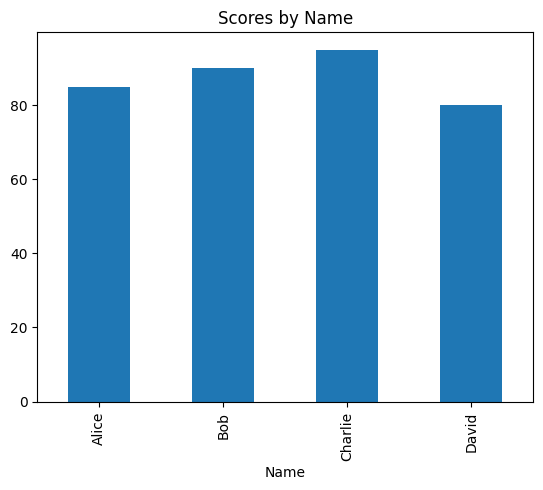

In [10]:
# Sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'Score': [85, 90, 95, 80]}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print("\n")

# 1. Reindexing
reindexed_df = df.reindex([3, 0, 1, 2])
print("Reindexed DataFrame:")
print(reindexed_df)
print("\n")

# 2. Iterations
print("Iterating over rows:")
for index, row in df.iterrows():
    print(f"Index {index}: {row['Name']} - {row['Score']}")
print("\n")

# 3. Sorting
sorted_df = df.sort_values(by='Score', ascending=False)
print("DataFrame sorted by 'Score' (descending):")
print(sorted_df)
print("\n")

# 4. Aggregations
avg_score = df['Score'].mean()
print(f"Average Score: {avg_score}")
print("\n")

# 5. Grouping
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'Score': [85, 90, 95, 80]}
df = pd.DataFrame(data)

# Grouping by 'Score' and calculating the mean for numeric columns
grouped_data = df.groupby('Score').mean(numeric_only=True)

print("Grouped by 'Score':")
print(grouped_data)

# 6. Merging
df2 = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Team': ['Red', 'Blue', 'Green']})
merged_df = pd.merge(df, df2, on='Name')
print("Merged DataFrame:")
print(merged_df)
print("\n")

# 7. Joining
df3 = pd.DataFrame({'Age': [25, 30, 35, 40]}, index=['Alice', 'Bob', 'Charlie', 'David'])
joined_df = df.set_index('Name').join(df3, lsuffix='_original', rsuffix='_new')
print("Joined DataFrame:")
print(joined_df)
print("\n")

# 8. Concatenation
df4 = pd.DataFrame({'Name': ['Eve', 'Frank'], 'Age': [45, 50], 'Score': [88, 92]})
concatenated_df = pd.concat([df, df4], ignore_index=True)
print("Concatenated DataFrame:")
print(concatenated_df)
print("\n")

# 9. Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())
print("\n")

# 10. Statistical Functions
std_dev = df['Score'].std()
print(f"Standard Deviation of Scores: {std_dev}")
print("\n")

# 11. Window Functions
df['Rolling_Avg'] = df['Score'].rolling(window=2).mean()
print("DataFrame with Rolling Average (window=2):")
print(df)
print("\n")

# 12. Visualization using Pandas
print("Bar Chart of Scores by Name (using Pandas):")
df.plot(kind='bar', x='Name', y='Score', title='Scores by Name', legend=False)